# Assignment Part - I
### Surprise Housing - Advance Regression


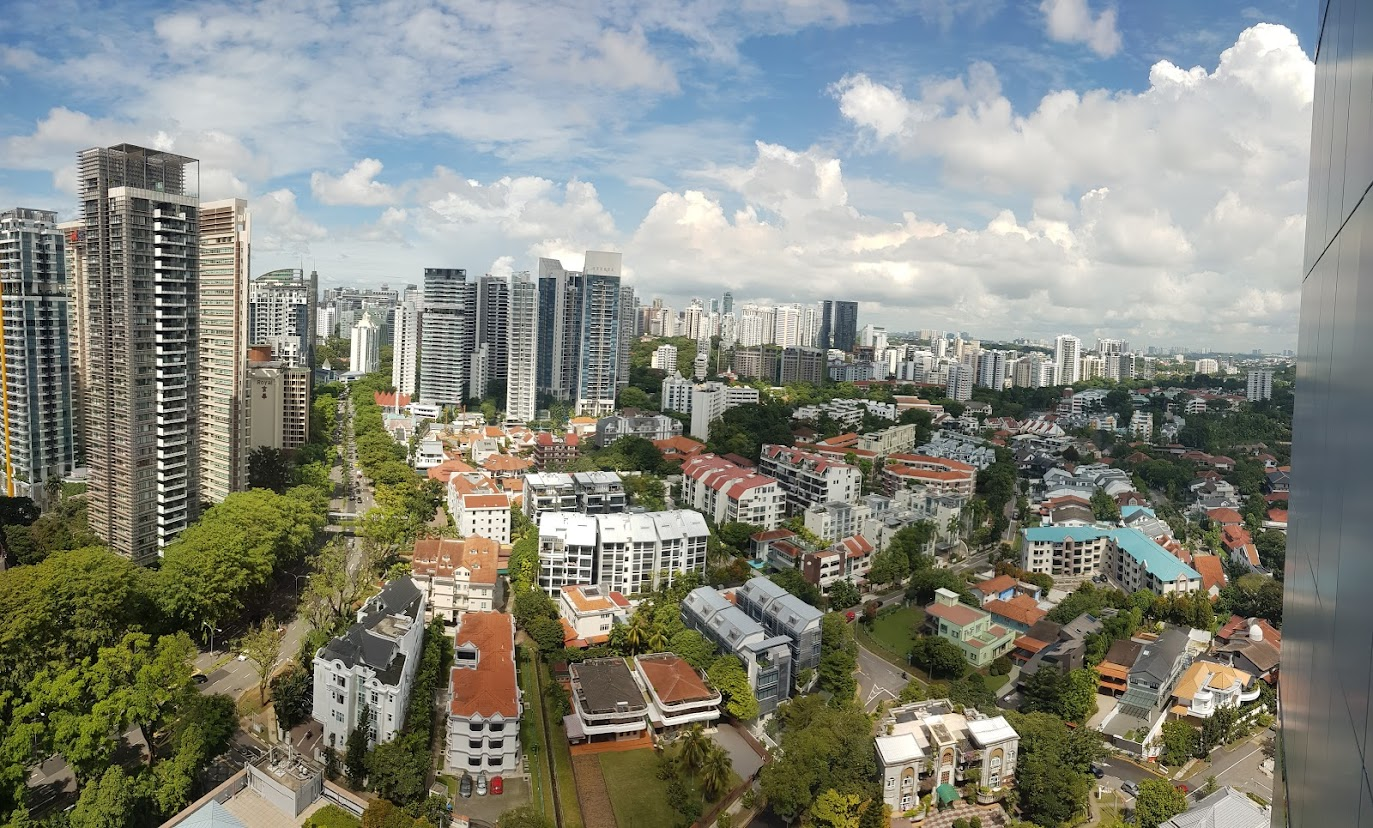


# 1. Problem Statement
## 1.1 Background
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

    * Which variables are significant in predicting the price of a house, and

    * How well those variables describe the price of a house.
 

Also, determine the optimal value of lambda for ridge and lasso regression.

## 1.2 Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



# 2. Data Preparation
## 2.1 Data Validation and Cleaning

* Check the null values
* Impute values
* Clean / separate unwanted data / Bias

Target variables to select potential proerty could be SaleType,	SaleCondition or SalePrice.


###### library used
* pandas, numpy

In [733]:
import numpy as np
import pandas as pd
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#set dispalys
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#import lib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [734]:
#load data
hs_df= pd.read_csv('train.csv')
hs_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [735]:
#lets describe
hs_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [736]:
# get the column
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [737]:
#check null values 
hs_df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [738]:

cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = hs_df[cols].quantile(0.05)
Q3 = hs_df[cols].quantile(0.95)
IQR = Q3 - Q1

hs_df =hs_df[~((hs_df[cols] < (Q1 - 1.5 * IQR)) |(hs_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

hs_df.shape

(1333, 81)

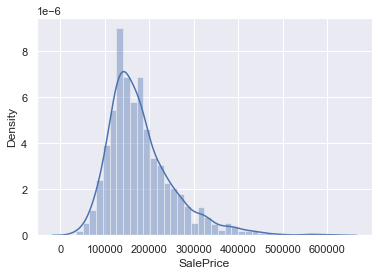

In [739]:
# Plot Sale columns
plt.figure()
sns.distplot(hs_df['SalePrice'],color='b')
plt.show()

In [740]:
#checking column with null values

for col in hs_df:
    if hs_df[col].isnull().sum() * 100 / len(hs_df) > 0:
        print(col + ' - ' + str(round(hs_df[col].isnull().sum() * 100 / len(hs_df),2)) + '%')


LotFrontage - 18.15%
Alley - 94.22%
MasVnrType - 0.53%
MasVnrArea - 0.53%
BsmtQual - 1.5%
BsmtCond - 1.5%
BsmtExposure - 1.58%
BsmtFinType1 - 1.5%
BsmtFinType2 - 1.58%
Electrical - 0.08%
FireplaceQu - 45.99%
GarageType - 4.28%
GarageYrBlt - 4.28%
GarageFinish - 4.28%
GarageQual - 4.28%
GarageCond - 4.28%
PoolQC - 99.77%
Fence - 80.35%
MiscFeature - 96.77%


### Data cleaning

*  null values in the column may affect the price
*  update missing values with max values in the particular column


In [741]:
# drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
hs_df = hs_df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [742]:
#imputing null values
hs_df_bk=hs_df

#fill known values


# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
hs_df['LotFrontage'] = hs_df['LotFrontage'].fillna(hs_df['LotFrontage'].median())

hs_df['GarageYrBlt'] = hs_df['GarageYrBlt'].fillna(hs_df['GarageYrBlt'].median())

hs_df['GarageCond'] = hs_df['GarageCond'].fillna(hs_df['GarageCond'].mode()[0])



for col in hs_df:
    if hs_df[col].isnull().sum() * 100 / len(hs_df) > 0:
        hs_df[col] = hs_df[col].fillna(hs_df[col].mode()[0])





In [743]:
# checking for the presence of any more null values
hs_df.isnull().values.any()

False

In [744]:
#check if any null value exist

hs_df.isnull().sum() * 100 / len(hs_df)


MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [745]:
# Check the shape
hs_df.shape

(1333, 75)

In [746]:
#get column name with 10 or less unique values present.

for col in hs_df:
    if hs_df[col].nunique() < 10:
        print(col + ' - ' + str(hs_df[col].nunique()) + ' - ' + str(hs_df[col].unique()))
    


MSZoning - 5 - ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street - 2 - ['Pave' 'Grvl']
LotShape - 4 - ['Reg' 'IR1' 'IR2' 'IR3']
LandContour - 4 - ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities - 2 - ['AllPub' 'NoSeWa']
LotConfig - 5 - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope - 3 - ['Gtl' 'Mod' 'Sev']
Condition1 - 9 - ['Norm' 'Feedr' 'PosN' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'Artery' 'RRNe']
Condition2 - 4 - ['Norm' 'RRNn' 'Feedr' 'PosN']
BldgType - 5 - ['1Fam' 'TwnhsE' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle - 8 - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallCond - 9 - [5 8 6 7 4 3 9 2 1]
RoofStyle - 6 - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl - 5 - ['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl']
MasVnrType - 4 - ['BrkFace' 'None' 'Stone' 'BrkCmn']
ExterQual - 4 - ['Gd' 'TA' 'Ex' 'Fa']
ExterCond - 5 - ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation - 6 - ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
BsmtQual - 4 - ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond - 4 - ['TA' 

In [747]:
hs_df.shape

(1333, 75)

# 3. Perform Exploratory Data Analysis (EDA)
## 3.1 Univariate and Bivariate Analysis




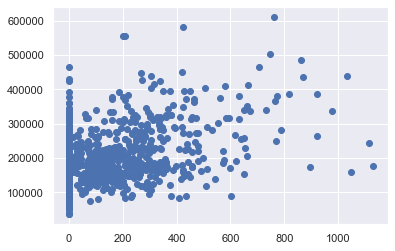

In [748]:
#check corelation 

plt.scatter(hs_df.MasVnrArea, hs_df.SalePrice)


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

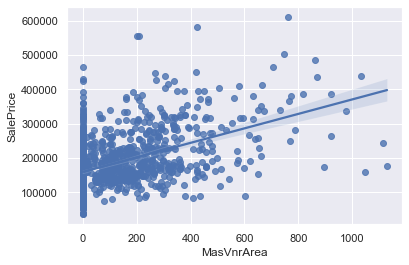

In [749]:
#You can see the correlation of the two columns of the dataframe as a scatterplot.


hs_df.MasVnrArea.corr(hs_df.SalePrice)

sns.regplot(x=hs_df["MasVnrArea"], y=hs_df["SalePrice"])



there are some records with inverse correlation. 

In [750]:
#get the overall corr
corr = hs_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425084,-0.369099,0.090690,-0.072448,0.122090,0.084129,0.054778,-0.051959,-0.059338,-0.159733,-0.251979,-0.294396,0.311003,nan,0.050132,0.026717,-0.006741,0.101069,0.227143,-0.118545,nan,-0.038974,-0.004254,0.120379,0.001658,-0.070819,0.015978,0.012697,-0.038133,-0.039157,-0.021604,0.007424,-0.039349,-0.017910,-0.018475,-0.048687
LotFrontage,-0.425084,1.000000,0.525531,0.229812,-0.060355,0.147341,0.080608,0.166749,0.133725,0.033378,0.147817,0.317813,0.356386,0.037496,nan,0.305808,0.056561,-0.014403,0.172757,0.050978,0.263823,nan,0.309712,0.225002,0.083544,0.306133,0.331410,0.087770,0.136504,-0.008182,0.077932,0.053206,0.011628,0.004585,0.010482,0.007858,0.362908
LotArea,-0.369099,0.525531,1.000000,0.162689,-0.029780,0.054619,0.021362,0.135008,0.183677,0.054700,0.075983,0.299689,0.382030,0.089327,nan,0.371310,0.089631,0.045155,0.164715,0.080633,0.281025,nan,0.348038,0.293615,0.005639,0.287988,0.323688,0.171251,0.159597,-0.011207,0.075708,0.093427,0.045301,0.027992,-0.009880,-0.022983,0.362222
OverallQual,0.090690,0.229812,0.162689,1.000000,-0.137345,0.599228,0.550117,0.415273,0.201327,-0.108322,0.344380,0.558339,0.503978,0.288731,nan,0.641122,0.097250,-0.060343,0.618797,0.257954,0.143843,nan,0.519535,0.380875,0.529436,0.631896,0.571237,0.227200,0.319979,-0.120626,0.031976,0.038780,-0.004869,-0.019436,0.084229,-0.004752,0.809823
OverallCond,-0.072448,-0.060355,-0.029780,-0.137345,1.000000,-0.409069,0.041759,-0.137891,-0.039483,0.045371,-0.148921,-0.190837,-0.140903,0.007927,nan,-0.100764,-0.044657,0.136933,-0.216599,-0.071536,0.018274,nan,-0.060010,-0.051029,-0.338956,-0.211363,-0.176809,-0.031163,-0.064908,0.090560,0.021084,0.042613,0.033812,0.091110,0.002264,0.044080,-0.123561
YearBuilt,0.122090,0.147341,0.054619,0.599228,-0.409069,1.000000,0.615544,0.310607,0.238567,-0.079815,0.181871,0.429192,0.316285,0.063589,nan,0.298233,0.179082,-0.047904,0.565665,0.232649,-0.019124,nan,0.205317,0.145105,0.809593,0.570340,0.509288,0.229533,0.256483,-0.390298,0.032878,-0.050073,-0.002104,-0.036777,0.026814,-0.004657,0.568003
YearRemodAdd,0.084129,0.080608,0.021362,0.550117,0.041759,0.615544,1.000000,0.177172,0.101417,-0.109414,0.215223,0.308445,0.267731,0.149896,nan,0.337498,0.108220,-0.022534,0.496577,0.168285,-0.010541,nan,0.263796,0.093186,0.631892,0.454468,0.396036,0.191081,0.259675,-0.212482,0.042801,-0.050944,-0.012810,0.007582,0.023970,0.045584,0.526643
MasVnrArea,0.054778,0.166749,0.135008,0.415273,-0.137891,0.310607,0.177172,1.000000,0.226364,-0.066277,0.123882,0.356874,0.343273,0.146288,nan,0.392089,0.089578,-0.000441,0.277077,0.196238,0.099981,nan,0.303113,0.254996,0.251782,0.375337,0.379219,0.156644,0.135263,-0.102353,0.023574,0.055842,-0.019357,-0.025012,-0.005099,0.007738,0.480634
BsmtFinSF1,-0.051959,0.133725,0.183677,0.201327,-0.039483,0.238567,0.101417,0.226364,1.000000,-0.056726,-0.546126,0.453605,0.399625,-0.195011,nan,0.133047,0.657869,0.057304,0.060581,-0.041702,-0.113254,nan,0.026807,0.222328,0.145423,0.221884,0.273979,0.171940,0.093932,-0.112470,0.033674,0.071759,-0.007890,0.004531,-0.006498,0.035050,0.383124
BsmtFinSF2,-0.059338,0.033378,0.054700,-0.108322,0.045371,-0.079815,-0.109414,-0.066277,-0.056726,1.000000,-0.198654,0.062607,0.067891,-0.109752,nan,-0.045230,0.123028,0.105036,-0.089824,-0.056591,0.005006,nan,-0.044041,0.006679,-0.107683,-0.065313,-0.035958,0.052733,-0.019039,0.059293,-0.030185,0.052482,0.029712,-0.012772,0.003409,0.043271,-0.071073


In [751]:
#MasVnrArea' with respect to 'Saleprice' correlation


hs_df_ar_sp = hs_df[['MasVnrArea','GarageArea','SalePrice', 'OverallCond','YearBuilt']]


corr = hs_df_ar_sp.corr()
corr.style.background_gradient(cmap='coolwarm')


,MasVnrArea,GarageArea,SalePrice,OverallCond,YearBuilt
MasVnrArea,1.000000,0.379219,0.480634,-0.137891,0.310607
GarageArea,0.379219,1.000000,0.660029,-0.176809,0.509288
SalePrice,0.480634,0.660029,1.000000,-0.123561,0.568003
OverallCond,-0.137891,-0.176809,-0.123561,1.000000,-0.409069
YearBuilt,0.310607,0.509288,0.568003,-0.409069,1.000000


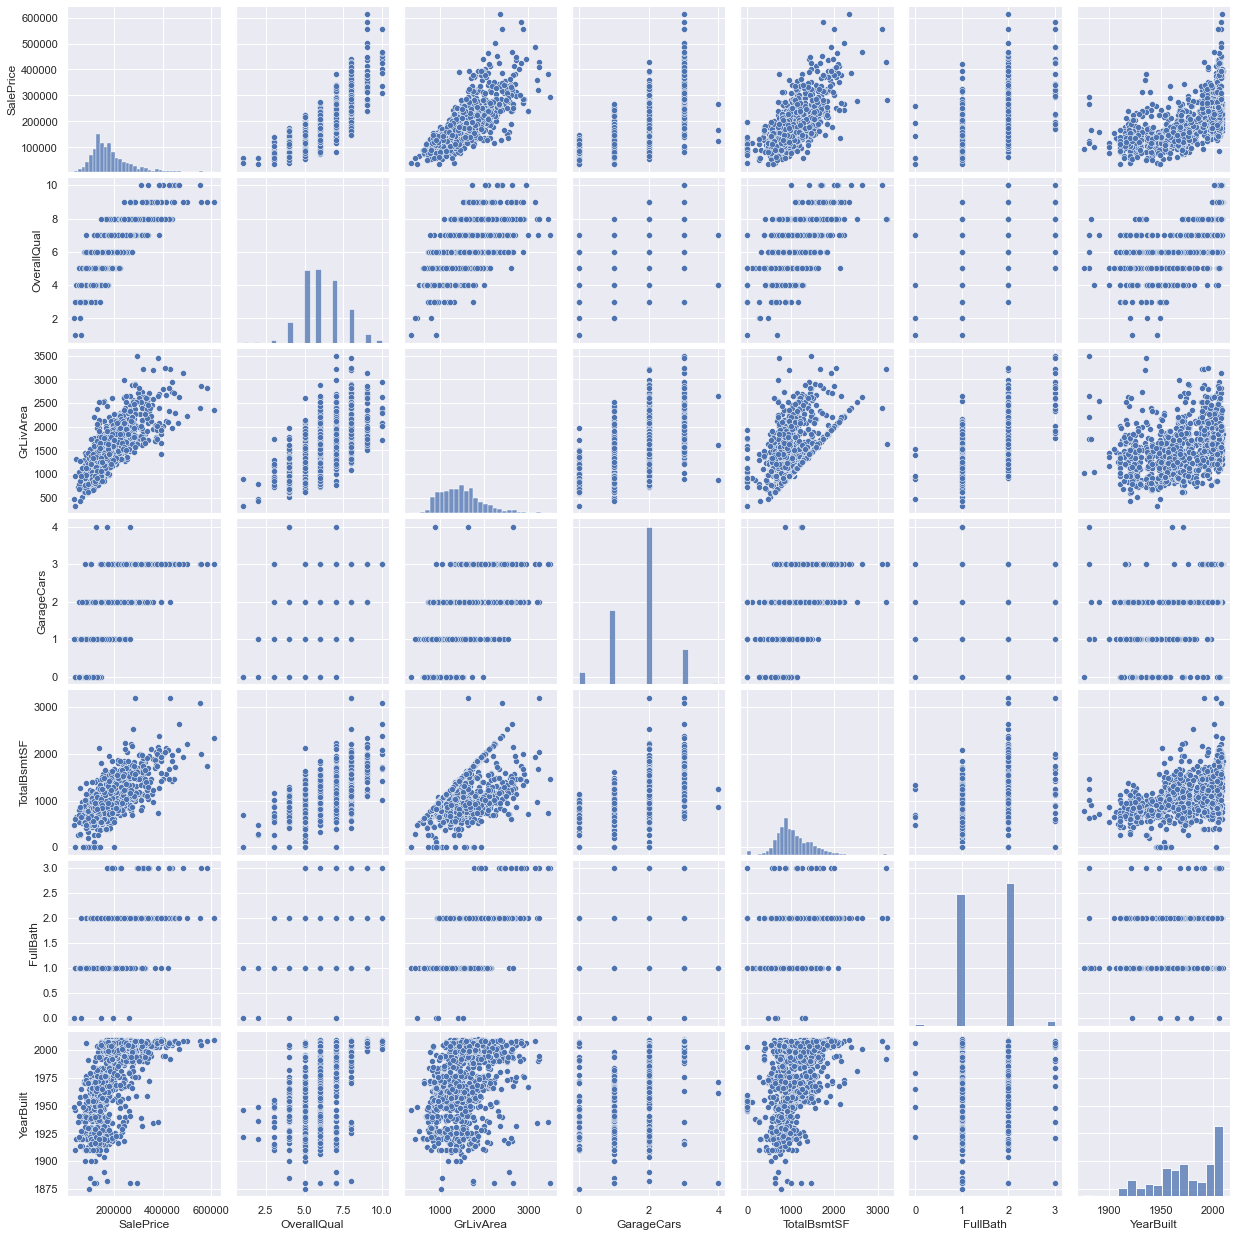

In [752]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(hs_df[cols], size = 2.5)
plt.show();

In [753]:
#Converting a Binary  into numeric 
# mapping it to 0 and 1
hs_df['Street'] = hs_df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

hs_df['CentralAir'] = hs_df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
hs_df['PavedDrive'] = hs_df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)    

In [754]:
#remove these columns as does not carry or participate in the model
hs_df = hs_df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)


In [755]:
# create dummies
#hs_df_bk=hs_df


hs_df = pd.get_dummies(hs_df, drop_first=True)
hs_df.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,7,5,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,1,0,61,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,6,8,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,1,298,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,7,5,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,1,0,42,0,0,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,7,5,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,1,0,35,272,0,2,2006,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,8,5,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,1,192,84,0,0,12,2008,250000,0,0,1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# 4. Model the data
## 4.1 Train and Test Split



* importing library at respective places to know the usage of the lib

In [756]:
#import lib

from sklearn.model_selection import train_test_split


In [757]:
hs_df_y = hs_df.pop('SalePrice')
hs_df_y.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [758]:
hs_df.shape

(1333, 220)

In [759]:
hs_df_x_train, hs_df_x_test, hs_df_y_train, hs_df_y_test = train_test_split(hs_df, hs_df_y, test_size=0.33, random_state=42)


In [760]:
hs_df_x_train.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,60,70.0,8063,1,6,5,2000,2000,0.0,0,0,924,924,1,948,742,0,1690,0,0,2,1,3,1,7,1,2000.0,2,463,1,100,48,0,0,11,2007,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
745,60,70.0,8963,1,8,9,1976,1996,289.0,575,80,487,1142,1,1175,1540,0,2715,0,1,3,1,4,1,11,2,1994.0,2,831,1,0,204,0,0,7,2008,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1134,60,57.0,8773,1,6,5,1997,1997,0.0,0,0,916,916,1,916,684,0,1600,0,0,2,1,3,1,7,1,1997.0,2,460,1,100,38,0,0,8,2007,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
512,20,70.0,9100,1,5,5,1958,1958,0.0,521,174,169,864,1,864,0,0,864,1,0,1,0,3,1,5,0,1964.0,2,624,1,0,0,0,0,7,2006,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
43,20,70.0,9200,1,5,6,1975,1980,0.0,280,491,167,938,1,938,0,0,938,1,0,1,0,3,1,5,0,1977.0,1,308,1,145,0,0,0,7,2008,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [761]:
hs_df_x_test.head()


,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,60,82.0,9452,1,8,5,1997,1998,423.0,1074,0,322,1396,1,1407,985,0,2392,1,0,2,1,3,1,7,1,1997.0,3,870,1,0,70,0,0,6,2006,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1161,20,70.0,14778,1,6,7,1954,2006,72.0,728,0,568,1296,1,1640,0,0,1640,1,0,1,0,3,1,7,1,1993.0,2,924,1,108,0,0,0,11,2008,0,0,1,0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1369,20,48.0,10635,1,8,5,2003,2003,171.0,370,972,315,1657,1,1668,0,0,1668,1,0,2,0,3,1,8,1,2003.0,2,502,1,0,262,0,0,5,2010,0,0,1,0,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
329,70,60.0,6402,1,5,5,1920,1950,0.0,0,0,596,596,0,596,596,0,1192,0,0,1,0,3,1,6,0,1920.0,1,189,0,0,0,137,0,7,2009,0,0,0,1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
262,80,88.0,8471,1,6,7,1977,1995,46.0,506,0,0,506,1,1212,0,0,1212,1,0,1,0,3,1,6,1,1978.0,2,492,1,292,12,0,0,7,2006,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [762]:
hs_df_y_test.head()


990     348000
1161    224000
1369    232000
329      78000
262     151000
Name: SalePrice, dtype: int64

In [763]:
num_cols=hs_df_x_train.select_dtypes(include=['int64','int32','float64','float32']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold'],
      dtype='object')

In [764]:
hs_df_x_train[num_cols].head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1108,60,70.0,8063,1,6,5,2000,2000,0.0,0,0,924,924,1,948,742,0,1690,0,0,2,1,3,1,7,1,2000.0,2,463,1,100,48,0,0,11,2007
745,60,70.0,8963,1,8,9,1976,1996,289.0,575,80,487,1142,1,1175,1540,0,2715,0,1,3,1,4,1,11,2,1994.0,2,831,1,0,204,0,0,7,2008
1134,60,57.0,8773,1,6,5,1997,1997,0.0,0,0,916,916,1,916,684,0,1600,0,0,2,1,3,1,7,1,1997.0,2,460,1,100,38,0,0,8,2007
512,20,70.0,9100,1,5,5,1958,1958,0.0,521,174,169,864,1,864,0,0,864,1,0,1,0,3,1,5,0,1964.0,2,624,1,0,0,0,0,7,2006
43,20,70.0,9200,1,5,6,1975,1980,0.0,280,491,167,938,1,938,0,0,938,1,0,1,0,3,1,5,0,1977.0,1,308,1,145,0,0,0,7,2008


In [765]:
#get the list columns and row count

print('X_train ',hs_df_x_train.shape)
print('X_test ',hs_df_x_test.shape)
print('y_train ',hs_df_y_train.shape)
print('y_test ',hs_df_y_test.shape)

X_train  (893, 220)
X_test  (440, 220)
y_train  (893,)
y_test  (440,)


In [766]:
##import libs 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [767]:
##   Scaling the data
scaler = StandardScaler()
hs_df_x_train[num_cols] = scaler.fit_transform(hs_df_x_train[num_cols])
hs_df_x_test[num_cols] = scaler.transform(hs_df_x_test[num_cols])


In [768]:
hs_df_x_train.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,0.143749,0.037340,-0.392981,0.067078,-0.080312,-0.538757,0.930638,0.693507,-0.594848,-1.035494,-0.293763,0.833600,-0.319415,0.230361,-0.554215,0.981479,0.0,0.437396,-0.847123,-0.246296,0.862399,1.228512,0.263023,0.0,0.400259,0.586713,0.883363,0.297658,-0.084733,0.258661,0.056802,0.043561,-0.365059,-0.273902,1.747572,-0.620081,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
745,0.143749,0.037340,-0.184495,0.067078,1.429546,3.099125,0.097147,0.498005,1.059157,0.296224,0.286069,-0.183241,0.218788,0.230361,0.063648,2.883746,0.0,2.591649,-0.847123,3.903558,2.722598,1.228512,1.628600,0.0,3.097853,2.164831,0.630258,0.297658,1.717319,0.258661,-0.760012,2.634676,-0.365059,-0.273902,0.280515,0.122187,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1134,0.143749,-0.606767,-0.228509,0.067078,-0.080312,-0.538757,0.826452,0.546881,-0.594848,-1.035494,-0.293763,0.814985,-0.339165,0.230361,-0.641315,0.843219,0.0,0.248242,-0.847123,-0.246296,0.862399,1.228512,0.263023,0.0,0.400259,0.586713,0.756811,0.297658,-0.099424,0.258661,0.056802,-0.122536,-0.365059,-0.273902,0.647279,-0.620081,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
512,-0.822332,0.037340,-0.152759,0.067078,-0.835240,-0.538757,-0.527971,-1.359265,-0.594848,0.171158,0.967372,-0.923185,-0.467544,0.230361,-0.782852,-0.787295,0.0,-1.298617,1.148868,-0.246296,-0.997800,-0.784445,0.263023,0.0,-0.948538,-0.991404,-0.635266,0.297658,0.703665,0.258661,-0.760012,-0.753705,-0.365059,-0.273902,0.280515,-1.362349,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
43,-0.822332,0.037340,-0.129594,0.067078,-0.835240,0.370714,0.062418,-0.284004,-0.594848,-0.387005,3.264957,-0.927839,-0.284851,0.230361,-0.581434,-0.787295,0.0,-1.143090,1.148868,-0.246296,-0.997800,-0.784445,0.263023,0.0,-0.948538,-0.991404,-0.086872,-1.131422,-0.843750,0.258661,0.424368,-0.753705,-0.365059,-0.273902,0.280515,0.122187,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [769]:
## Build Regression model here

hs_df_reg = LinearRegression()
hs_df_reg.fit(hs_df_x_train,hs_df_y_train)

LinearRegression()

In [770]:
#import feature selection lib

from sklearn.feature_selection import RFE


In [771]:
# get the RFE
hs_df_rfe_init = RFE(reg, 20)
hs_df_rfe = hs_df_rfe_init.fit(hs_df_x_train, hs_df_y_train)
hs_df_x_train.columns[~hs_df_rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [772]:
#import stats model libs

import statsmodels
import statsmodels.api as smapi
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [773]:
hs_df_train_cols=hs_df_x_train.columns[hs_df_rfe.support_]
 


hs_df_x_train2=hs_df_x_train[hs_df_train_cols]
hs_df_x_train_cons = smapi.add_constant(hs_df_x_train2)

#create first liner regression model
hs_df_lr_mdl =smapi.OLS(hs_df_y_train,hs_df_x_train_cons)

#fit the model
hs_df_lr_mdl=hs_df_lr_mdl.fit()

#Print the summary 
hs_df_lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     215.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.64e-290
Time:                        04:26:01   Log-Likelihood:                -10582.
No. Observations:                 893   AIC:                         2.120e+04
Df Residuals:                     876   BIC:                         2.128e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.911e+05    1.1e+04     17.332      0.000    1.69e+05    2.13e+05
BsmtFinSF1          1.431e+04    985.475     14.519      0.000    1.24e+04    1.62e+04
BsmtFinSF2          -823.6565   1138.967     -0.723      0.470   -3059.080    1411.767
BsmtUnfSF           1875.0789    984.265      1.905      0.057     -56.714    3806.872
TotalBsmtSF         1.696e+04   1561.980     10.859      0.000    1.39e+04       2e+04
1stFlrSF            1.264e+04   1637.211      7.721      0.000    9428.338    1.59e+04
2ndFlrSF            1.384e+04   1019.403     13.576      0.000    1.18e+04    1.58e+04
GrLivArea           2.196e+04    897.665     24.467      0.000    2.02e+04    2.37e+04
RoofStyle_Gable     2.285e+04   7257.858      3.148      0.002    8603.689    3.71e+04
RoofStyle_Gambrel   2.316e+04   1.34e+04      1.726      0.085   -3172.183    4.95e+04
RoofStyle_Hip       3.065e+04   7512.534      4.080      0.000    1.59e+04    4.54e+04
RoofStyle_Mansard  -2556.5676   1.67e+04     -0.153      0.878   -3.53e+04    3.02e+04
RoofStyle_Shed      3.767e+04   3.06e+04      1.232      0.218   -2.23e+04    9.77e+04
RoofMatl_Metal      6.885e+04   3.06e+04      2.253      0.024    8876.114    1.29e+05
RoofMatl_Tar&Grv    1.047e+04   1.65e+04      0.633      0.527    -2.2e+04    4.29e+04
Exterior1st_CBlock -9727.4452   1.88e+04     -0.518      0.604   -4.66e+04    2.71e+04
Exterior2nd_CBlock -9727.4452   1.88e+04     -0.518      0.604   -4.66e+04    2.71e+04
ExterQual_Fa       -5.718e+04   1.57e+04     -3.646      0.000    -8.8e+04   -2.64e+04
ExterQual_TA       -4.084e+04   2859.455    -14.281      0.000   -4.64e+04   -3.52e+04
GarageQual_Fa      -1.758e+04   1.19e+04     -1.473      0.141    -4.1e+04    5850.066
GarageQual_TA      -8986.9745   1.01e+04     -0.893      0.372   -2.87e+04    1.08e+04
==============================================================================
Omnibus:                      238.369   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1777.064
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       9.612   Cond. No.                     2.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [774]:
# Check the ranks
list(zip(hs_df_x_train.columns,hs_df_rfe.support_,hs_df_rfe.ranking_))

[('MSSubClass', False, 133),
 ('LotFrontage', False, 162),
 ('LotArea', False, 112),
 ('Street', False, 148),
 ('OverallQual', False, 48),
 ('OverallCond', False, 93),
 ('YearBuilt', False, 65),
 ('YearRemodAdd', False, 160),
 ('MasVnrArea', False, 143),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 191),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 8),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 200),
 ('BsmtHalfBath', False, 173),
 ('FullBath', False, 167),
 ('HalfBath', False, 189),
 ('BedroomAbvGr', False, 124),
 ('KitchenAbvGr', False, 11),
 ('TotRmsAbvGrd', False, 123),
 ('Fireplaces', False, 199),
 ('GarageYrBlt', False, 169),
 ('GarageCars', False, 135),
 ('GarageArea', False, 198),
 ('PavedDrive', False, 182),
 ('WoodDeckSF', False, 161),
 ('OpenPorchSF', False, 158),
 ('EnclosedPorch', False, 175),
 ('ScreenPorch', False, 154),
 ('MoSold', False, 195),
 ('YrSold'

###### Lasso and Ridge Regression

predicting house prices

In [775]:
#import lib
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LassoCV
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston



In [776]:
hs_df_params_vals = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [777]:
hs_df_lasso = Lasso()

# cross validation
hs_df_lasso_model_cv = GridSearchCV(estimator = hs_df_lasso, 
                        param_grid = hs_df_params_vals, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 4, 
                        return_train_score=True,
                        verbose = 1)            

hs_df_lasso_model_cv.fit(hs_df_x_train2, hs_df_y_train)



Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [778]:

hs_df_lasso_model_cv.best_params_


{'alpha': 100}

In [779]:

hs_df_lasso_model_cv.best_score_

-24536.246519722787

In [780]:
# cross validation - with another lib
hs_df_model_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100, 500, 1000 ])     
hs_df_model_cv.fit(hs_df_x_train, hs_df_y_train)
hs_df_model_cv.alpha_



100.0

In [781]:
hs_df_regr_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100, 500, 1000 ])



In [782]:
# Fit the linear regression

hs_df_regr_model_cv = hs_df_regr_cv.fit(hs_df_x_train, hs_df_y_train)
hs_df_regr_model_cv.alpha_


10.0

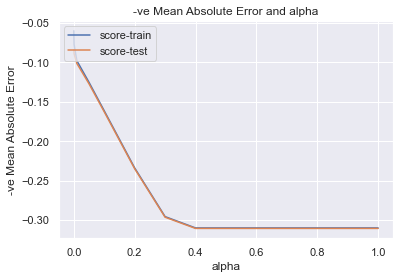

In [783]:
# plotting mean test and train scoes with alpha 
hs_df_crs_vldtn_lasso_results['param_alpha'] = hs_df_crs_vldtn_lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(hs_df_crs_vldtn_lasso_results['param_alpha'], hs_df_crs_vldtn_lasso_results['mean_train_score'])
plt.plot(hs_df_crs_vldtn_lasso_results['param_alpha'], hs_df_crs_vldtn_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('-ve Mean Absolute Error')
plt.title("-ve Mean Absolute Error and alpha")
plt.legend(['score-train', 'score-test'], loc='upper left')
plt.show()

* -ve mean abs error is lower side at alpha between 0.3 and 0.4
* Use this for trade-off for the bias-variance to retrieve coefficient of the smallest feature from the dataset

In [784]:
#set alpha to lowest 0.01 based on the above analysis
hs_df_alpha = 100
hs_df_lasso = Lasso(alpha=hs_df_alpha)

hs_df_lasso.fit(hs_df_x_train, hs_df_y_train)
hs_df_lasso.coef_


array([ -4913.94316168,   1825.6204679 ,   3672.4170388 ,   3222.18698716,
        11297.7012203 ,   5671.43843008,   8924.31972764,   2360.99379981,
         3515.52609671,   8720.3639484 ,    817.0107041 ,     -0.        ,
         5807.2117001 ,   -176.22062499,    516.03611441,      0.        ,
            0.        ,  26362.69708706,    447.57227478,   -961.73280072,
          382.25846745,     -0.        ,  -4208.85417321,      0.        ,
         5286.19344234,    565.59515791,     -0.        ,   2971.37654103,
         1070.38901575,    226.45499724,   1861.37108208,   1745.39182545,
          187.42943912,   2249.15510533,    147.67079491,   -190.2984225 ,
         1630.60556124,      0.        ,      0.        ,  -2939.36486348,
            0.        ,     -0.        ,    590.18090205,   3758.02419871,
        -8023.46803303,      0.        ,     -0.        ,   7597.92169798,
         -525.84900294,     -0.        ,   -178.42496185,      0.        ,
        -6069.81341614,  

In [785]:
#set alpha to lowest 0.01 based on the above analysis
hs_df_alpha = 20
hs_df_lasso = Ridge(alpha=hs_df_alpha)

hs_df_lasso.fit(hs_df_x_train, hs_df_y_train)
hs_df_lasso.coef_


array([ -4013.93043732,   2101.11865466,   3746.89152458,   2820.76634093,
        12768.75381851,   5830.12242126,   7470.54733972,   2634.7829475 ,
         4840.49136944,   8321.9052982 ,    489.28564106,   -999.6120425 ,
         7976.96704931,   -665.02489366,   7947.12814639,   9198.74674398,
            0.        ,  14246.66545209,    425.59766766,  -1302.95014618,
         1385.60240286,    772.47199237,  -4840.01755812,      0.        ,
         6425.07518516,   1060.95225622,   -226.34710837,   2577.21906611,
         1605.56343435,    572.18758085,   1732.60412004,   1920.72599879,
          481.01072911,   2285.77302825,    340.43780603,   -228.62412758,
         4376.94985352,    872.61178585,   2330.18802041,  -2796.58481868,
         2410.99513255,  -1567.39853862,    681.06433146,   5466.03522588,
        -4832.56513715,    601.94395673,  -1768.92386693,   6276.32013026,
        -2681.91442072,  -1759.03215373,   -790.98838121,    870.40425234,
        -4345.53579307,  

* with this step, coefficients is broughto to zero

In [786]:
#set the lasso params

# lasso model parameters
hs_df_lasso_model_parameters = list(hs_df_lasso.coef_ )
hs_df_lasso_model_parameters.insert(0, hs_df_lasso.intercept_)
hs_df_lasso_model_parameters = [round(x, 3) for x in hs_df_lasso_model_parameters]
hs_df_lasso_model_cols = hs_df_x_train.columns
hs_df_lasso_model_cols = cols.insert(0, "constant")
list(zip(cols, hs_df_lasso_model_parameters))

[('constant', 187685.077),
 ('SalePrice', -4013.93),
 ('OverallQual', 2101.119),
 ('GrLivArea', 3746.892),
 ('GarageCars', 2820.766),
 ('TotalBsmtSF', 12768.754),
 ('FullBath', 5830.122),
 ('YearBuilt', 7470.547)]

In [787]:
#import metric lib
from sklearn import metrics


In [789]:
#get Root-mean-square error

hs_df_rme = np.sqrt(metrics.mean_squared_error(y_test, hs_df_y_test_pred))

print('RMSE :', hs_df_rme)


RMSE : 0.15151504853037073


### Summary

- Check on predictors affecting the price of the house. positive coeeficients is correlated with a high sale value (e.g. GrLivArea, OverallQual, GarageArea_
- PropAge and MSSubClass has negavtive coeefiecinet which impacts sale value

So if Market value of the property is lesser than the predicted sale price then Surprise Housing should buy those properties.
